Jupyter notebook to demonstrate basic manipulation of digital images

In [2]:
# Starting with the usual imports
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
import cv2
from PIL import Image

Loading in some sample images using various formats:

In [16]:
# Our super basic RIT logo image using PIL
baseImg = Image.open('RIT.jpg')
baseImg.show()
# Our super basic RIT logo image using cv2
#baseImg_cv = cv2.imread('RIT.jpg')
#plt.imshow(baseImg_cv)
#plt.show()

Wait, why is it blue?

OpenCV represents images as arrays

Pillow, on the other hand, reads the image as an object

This means that PIL copies the pixels directly to an object, while openCV stores the pixel values in an array

The array created by openCV stores the pixel value as [b,g,r]; hence, blue where we would expect orange

Most CV relies on matrix manipulation, so how can we fix this?

By tranlating the openCV [b,g,r] to [r,g,b]

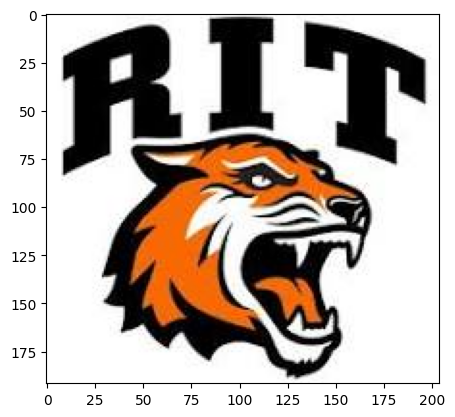

In [6]:
baseImg_cv = cv2.imread('RIT.jpg')
rgb = cv2.cvtColor(baseImg_cv, cv2.COLOR_BGR2RGB)
plt.imshow(rgb, cmap = plt.cm.Spectral)
plt.show()

Now let's display our image as a grayscale image

First, let's use Pillow and our image object

In [8]:
baseImg_cv = Image.open('RIT.jpg')
baseImg_gray = baseImg_cv.convert("L")
baseImg_gray.show()

Now let's convert to grayscale using openCV

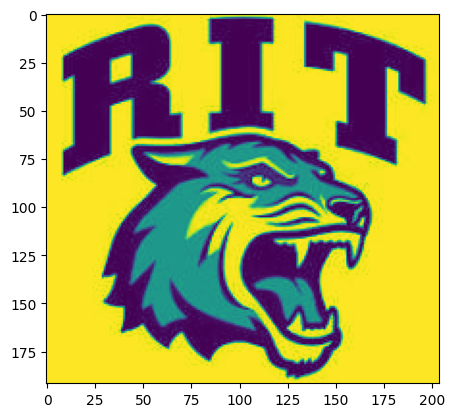

In [9]:
baseImg_cv = cv2.imread('RIT.jpg')
baseImg_gray_cv = cv2.cvtColor(baseImg_cv, cv2.COLOR_BGR2GRAY)
plt.imshow(baseImg_gray_cv)

That's....not grayscale...

Why?

Well, what happens if we convert from [b,g,r] to [r,g,b]?

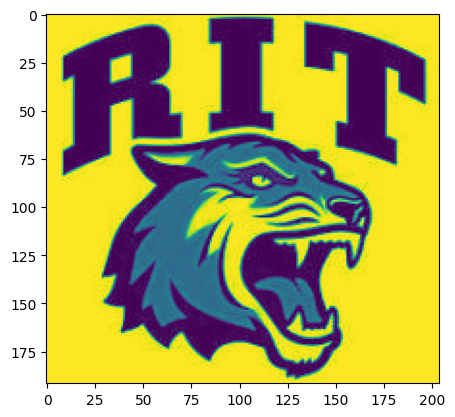

In [10]:
baseImg_cv = cv2.imread('RIT.jpg')
rgb = cv2.cvtColor(baseImg_cv, cv2.COLOR_BGR2RGB)
baseImg_gray_cv = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(baseImg_gray_cv)

We get the same result, because a grayscale image shouldn't have an channels, just relative intensities.

What is happening?

The cv2.COLOR_BGR2RGB and cv2.IMREAD_GRAYSCALE functions that tell the imread() and cvtColor() functions how to behave. That is, these functions convert the image *after* it has been stored in memory.

A better option is to read the image into memory in grayscale.

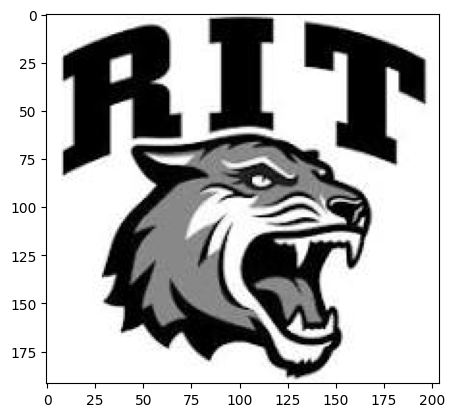

In [11]:
baseImg_cv = cv2.imread("RIT.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(baseImg_cv, cmap="gray")

So, what are the benefits of using openCV over Pillow, if openCV stores the pixel array in a wonky fashion?

Let's look at some of the image manipulation methods in Pillow.

Pillow relies on the Image.convert() method to translate between pixel formats. 

We just saw grayscale, but what else can we do?

In [13]:
baseImg = Image.open('RIT.jpg')
baseImg_conversion = baseImg.convert("1")
baseImg_conversion.show()

The "1" option converts the image into 1-bit pixels, either black or white.

In [14]:
baseImg = Image.open('RIT.jpg')
baseImg_conversion = baseImg.convert("P")
baseImg_conversion.show()

The "P" option converts from the native [r,g,b] pixel bands into 256 different colors, e.g., "P" is a function to highten colors.

One reason to make the change from Pillow to openCV is that these are the only image.convert() options.

What conversions are available with openCV? https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html
----a LOT.

Example 1: convert a [r,g,b] image to a YUV image
YUV are luminance-chromainance pixels - the pixel values are one luma plane and two chroma planes
YUV pixels contain on intensity band and two color bands

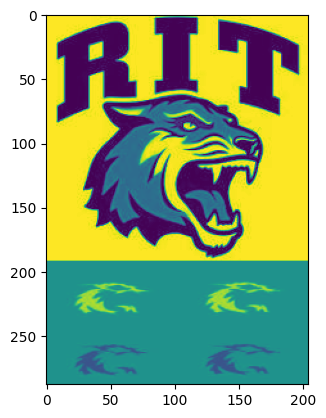

In [17]:
baseImg_cv = cv2.imread("RIT.jpg")
img1 = cv2.cvtColor(baseImg_cv,  cv2.COLOR_RGB2YUV_I420)
plt.imshow(img1)

Wait, what's all the garbage at the end? The converstion of RGB to YUV changes the resolution / aspect ration of the source image. 

RGB to YUV using the [4:2:0] pixel space creates garbage pixels.

-- Each type of image conversion using built-in libraries comes with its own unique methods, and it is crucial to understand the underlying matrix manipulation to successfully leverage CV algorithms.
-- The power of openCV over Pillow is that openCV let's us work directly with the pixels, which means we can create our own, arbitrary, image conversion methods.